In [5]:
# import libraries
import os,sys

# Get 
current_dir=os.getcwd()
print(current_dir)

#Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)

#Insert the path to the parent directory
sys.path.insert(0,parent_dir)

c:\Users\pc\Desktop\KAIM_Week_3\Project_Week_3\notebooks
c:\Users\pc\Desktop\KAIM_Week_3\Project_Week_3


In [ ]:
#import libraries
import pandas as pd
import numpy as np

# import functions/class
from scripts.load_data import read_csv_file
from scripts.eda import calculate_variability,check_missing_values,compare_changes
from scripts.visualization import plot_histograms, plot_bar_charts
from scripts.visualization import plot_correlation_matrix,plot_relationships,detect_outliers




ModuleNotFoundError: No module named 'pandas'

In [13]:
# Load the dataset
os.chdir('../scripts')
file_path='../Data/MachineLearningRating_v3.csv'
data=read_csv_file(file_path)
data.head(4)

NameError: name 'read_csv_file' is not defined

# Data Summarization

Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.

In [62]:
# Specify columns to analyze
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

variability_results = calculate_variability(data, numerical_columns)
print(variability_results) 

                  variance      std_dev  coeff_variation
TotalPremium  5.303096e+04   230.284513         3.719936
TotalClaims   5.683812e+06  2384.074695        36.756567


Data Structure: 
Review the dtype of each column to confirm if categorical variables, dates, etc. are properly formatted.

In [102]:
data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

# Data Quality Assessment:

Check for missing values.

In [130]:
missing_value = check_missing_values(data)
print(missing_value)

                          Missing Count  Missing Percentage
UnderwrittenCoverID                   0            0.000000
PolicyID                              0            0.000000
TransactionMonth                      0            0.000000
IsVATRegistered                       0            0.000000
Citizenship                           0            0.000000
LegalType                             0            0.000000
Title                                 0            0.000000
Language                              0            0.000000
Bank                             145961           14.594670
AccountType                       40232            4.022806
MaritalStatus                      8259            0.825819
Gender                             9536            0.953507
Country                               0            0.000000
Province                              0            0.000000
PostalCode                            0            0.000000
MainCrestaZone                        0 

# Univariate Analysis
Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..

In [99]:
numerical=data.select_dtypes(include=np.number).columns.tolist()
print(numerical)

['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


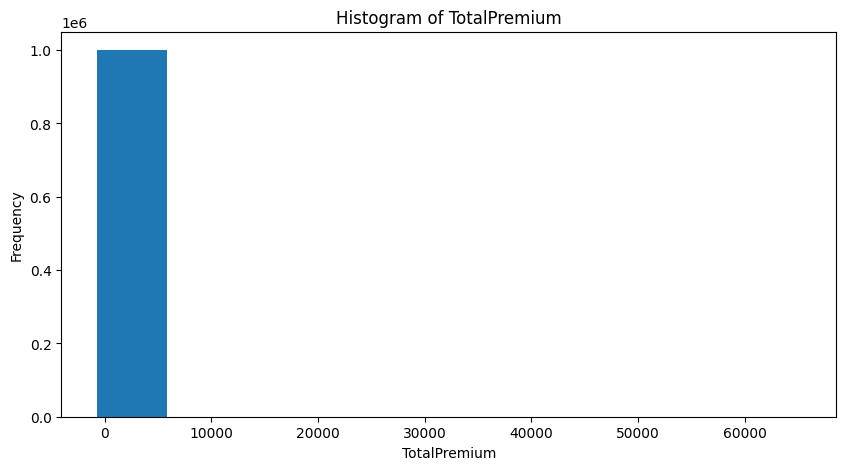

In [125]:
# Specify columns to analyze
numerical_columns = ['TotalPremium']

plot_histograms(data, numerical_columns)

In [94]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print (categorical_cols)

Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')


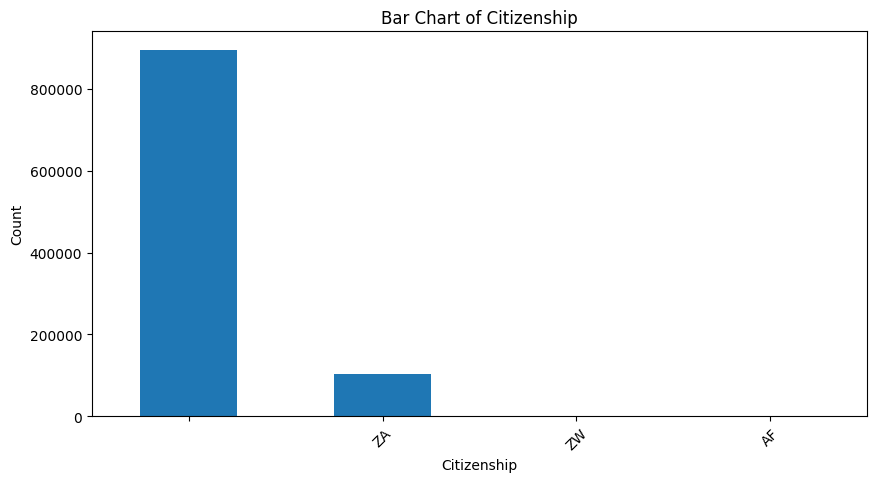

In [127]:
# Specify columns to analyze
categorical_columns = ['Province']

plot_bar_charts(data, categorical_columns)

# Bivariate or Multivariate Analysis:
Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots

In [ ]:
 # Plot relationships

message = plot_relationships(data, 'TotalPremium', 'TotalClaims', 'PostalCode')
print(message)

Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using  correlation matrices.

# Data Comparison
Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc


In [ ]:
# Ensure the Date column is datetime
data['Date'] = pd.to_datetime(data['Date'])

 # Specify columns to compare
columns_to_compare = ['InsuranceCoverType', 'Premium', 'AutoMake']

    # Analyze changes
result = compare_changes(data, id_col='PolicyID', time_col='Date', columns_to_compare=columns_to_compare)

# Outlier Detection:
Use box plots to detect outliers in numerical data


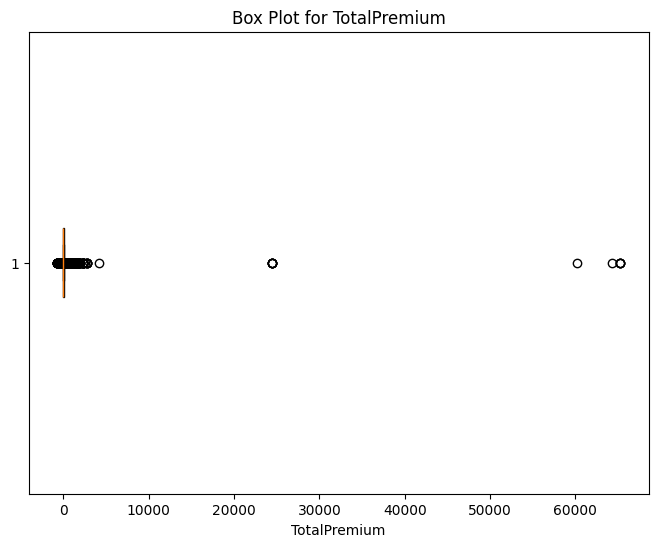

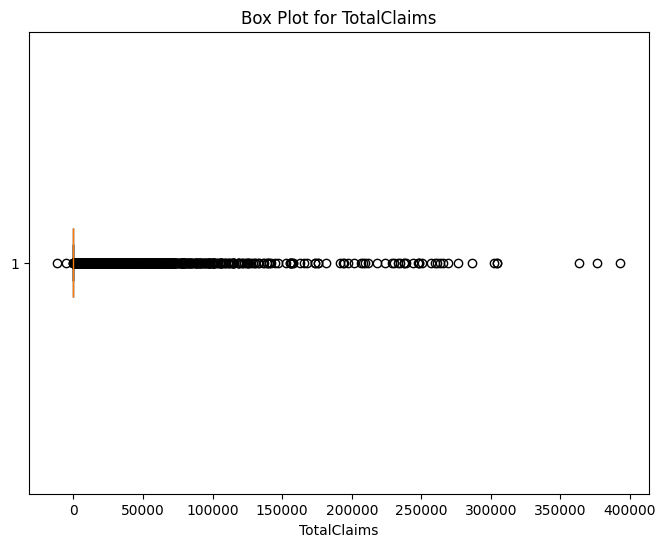

Outliers detected in TotalPremium:
3          512.848070
13         458.051613
14         709.980000
15         709.980000
16         526.759355
              ...    
1000091    347.235175
1000092    347.235175
1000093    347.235175
1000094    347.235175
1000095    347.235175
Name: TotalPremium, Length: 209042, dtype: float64
Outliers detected in TotalClaims:
203         2294.096491
284         2040.473684
1560       46492.211754
1779       26516.859649
1943        6140.350877
              ...      
998512      7996.535088
998848     40011.859649
999218    101812.517544
999701    155317.578947
999923     28903.850877
Name: TotalClaims, Length: 2793, dtype: float64


In [4]:
# Detect outliers
numerical_columns = ['TotalPremium', 'TotalClaims']
outliers = detect_outliers(data, numerical_columns)

for col, values in outliers.items():
    print(f"Outliers detected in {col}:")
    print(values)